# Прикладная статистика. ДЗ 1.
# Академия Аналитиков Авито

__Правила:__
- Финальный дедлайн: **2022-11-30 23:59**. 
- После того как ваше решение проверят и ответят, вам дается неделя на исправление тех задач, о которых скажет проверяющий. Ответ и обсуждение решения — в телеграме.

- Выполненную работу нужно отправить
    - в чатик HW1-<ваше имя> через бота @AAA_stats23_bot
    - или в личные сообщения боту.
- В качестве решения нужно отправить файл ipynb. Ссылка на интернет-ресурсы не принимается. Не публикуйте решения в открытом доступе!
- Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. **При этом можно добавлять новые ячейки!**
- в ячейках с комменарием `#Автопроверка` нужно заполнить содержимое функций и классов (если есть), которые будут уже объявлены в этой ячейке. При этом:
    - Нельзя убрирать или переставять `#Автопроверка` в ячейке. 
    - Нельзя менять сигнатуру и возвращаемое значение функций. То есть добавлять любой код можно, но удалять, что уже написано - нельзя.
    - Нельзя ничего импортировать в таких ячейках. Все доступные для использования библиотеки будут указаны заранее. Такие слова, как `import`, `globals`, `locals`, `eval`, `exec` также нельзя использовать внутри ячеек.
    - Нельзя использовать библиотеки, кроме тех, что указаны в задании. Ваш код должен работать именно с эти набором библиотек без любого дополнительного импорта!
    - Нельзя использовать код из других ячеек ноутбука (кроме ячейки с импортом, в которой указаны все доступные библиотеки). Единственное исключение - если вы проставите в начало такой ячейки слово `#Автопроверка`. Тогда вы можете использовать код из этой ячейки.
    - В случае нарушения этого правила автопроверка будет провалена и вы не получите часть баллов за задачу. 
    - В случае, если есть несколько ячеек автопроверки, то в каждой такой ячейке можно использовать созданные вами функции (или классы) из других ячеек автопроверки.

In [61]:
from collections import namedtuple
from scipy.stats import binom
import math
import numpy as np

# Общие замечания по задачам с автопроверкой

Во всех задачах далее, где потребуется автопроверка, можно использовать только следующие библиотеки:

```
from collections import namedtuple
from scipy.stats import binom
import math
import numpy as np
```

Еще раз обращаем внимание, что в ячейках автопроверки __не__ должны быть импортированы какие-либо библиотеки. В других ячейках импортировать библиотеки можно, но при проверке использованы будут только указанные.

## Задача 1. 3 балла

[Осьминог Пауль](https://www.championat.com/football/article-3238881-samye-izvestnye-zhivotnye-predskazateli.html) 14 раз пробовал угадать победителя футбольного матча.
12 раз он угадал правильно, 2 раза — ошибся. Мы хотим проверить гипотезу:

 - $H_0$: осьминог угадывает победителя матча с вероятностью 0.5
 - $H_1$: осьминог выбирает победителя  матча с вероятностью $\neq$ 0.5

#### Пункт А. 1 балл: 

### На зачет

Вам нужно разработать статистический критерий для проверки этой гипотезы, а также посчитать p-value.

# Теоретические выкладки

$\textbf{Формулировка задачи}$

Пусть $\xi - $ величина конверсии. То есть $\xi_i = 1$, если Пауль угадал результат матча и, наоборот, $\xi_i = 0$, если не угадал. Тогда на математическом языке:
$$ H_0:  \mu = 0.5$$
$$ H_1: \mu \neq 0.5 $$
Где $\mu$ - вероятность угадать результат матча.

$\textbf{Статистический критерий}$

Наша выборка состоит из 14-ти величин $\xi_i$, которые представляют собой нули и единицы. Тогда введем статистику Q как сумму величин $\xi_i$:
$$ Q(\xi^n) = \sum_{i=1}^n \xi_i $$

Тогда для заданной $\alpha = 5 \%$ найдем критические значения Q слева и справа:

In [62]:
alpha_max = 0.05

critical_value_right = binom.ppf(1 - alpha_max/2, n = 14, p = 0.5) + 1
critical_value_left = binom.ppf(alpha_max/2, n = 14, p = 0.5) - 1
print(f'Критические значения k: k<= {critical_value_left} и k>= {critical_value_right}' )

Критические значения k: k<= 2.0 и k>= 12.0


То есть при $\alpha = 5 \%$ мы будем отвергать нулевую гипотезу при реализации $ Q \geq 12 $ и при $Q \leq 2$

По условию количество верных предсказаний Осьминога, то есть реализация статистики Q, равна:

$k = 12$, а значит мы отвергаем $H_0$

Реализуем то же самое на языке p-value в функции $\textit{PaulCheckResults}$

Реализуйте критерий `check_paul_criterion(n, k, alpha)`, где 
- `n` &mdash; количество матчей;
- `k` &mdash; количество верных предсказаний от осьминога;
- `alpha` &mdash; уровень значимости критерия.

Функция должна вернуть `PaulCheckResults` с полями
- is_rejected: отверглась или нет гипотеза H_0 на уровне значимости alpha
- pvalue


In [63]:
# Автопроверка

PaulCheckResults = namedtuple('PaulCheckResults', ['is_rejected', 'pvalue'])

def check_paul_criterion(n: int, k: int, alpha: float = 0.05):
    """
    Параметры:
    - n: количество матчей
    - k: количество верных предсказаний от осьминога
    - alpha: уровень значимости критерия.
        
    Возвращает:
    - PaulCheckResults с полями:
        - is_rejected: bool
            - отверглась или нет гипотеза H_0 
                       на уровне значимости alpha
        - pvalue: float
    """

    is_rejected = None
    pvalue = None

    pvalue_one_side = 1 - binom.cdf(k-1, n, p = 0.5)
    if pvalue_one_side > 0.5:
        pvalue_one_side = binom.cdf(k, n, p = 0.5)
    
    pvalue = pvalue_one_side * 2
    
    is_rejected = (pvalue <= alpha)
    
    

    return PaulCheckResults(is_rejected, pvalue)


In [64]:
check_paul_criterion(n = 14, k = 12, alpha = 0.05)

PaulCheckResults(is_rejected=True, pvalue=0.012939453125)

#### Пункт B. 2 балла: 

Какие выводы можно сделать из полученного результата?

Для более наглядного восприятия полученного результата построим график

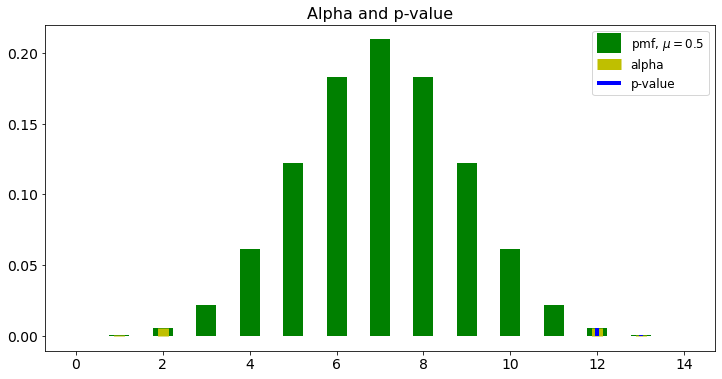

In [65]:
from matplotlib import pyplot

n = 14
mu0 = 0.5
critical_value_right = 12
critical_value_left = 2
k = 12

x = np.arange(start = 0, stop = n+1)
y = binom.pmf(x, n, mu0)

pyplot.figure(figsize = (12,6))

pyplot.vlines(x, 0, y, colors='g', linestyles='-', linewidth=20.0, label='pmf, $\mu = 0.5$')

y_critical = [0 if (x_i < critical_value_right and x_i > critical_value_left) else binom.pmf(x_i, n, mu0) for x_i in x]
pyplot.vlines(x, 0, y_critical, colors='y', linestyles='-', linewidth=11.0, label='alpha')

y_pval = [0 if x_i < k else binom.pmf(x_i, n, mu0) for x_i in x]
pyplot.vlines(x, 0, y_pval, colors='b', linestyles='-', linewidth=4.0, label='p-value')

pyplot.title('Alpha and p-value', fontsize=16)
pyplot.legend(loc='best', prop={'size':12})
pyplot.xticks(fontsize=14)
pyplot.yticks(fontsize=14)
pyplot.show()

Итак, мы получили отвержение нулевой гипотезы и p-value = 0.012939453125 для двустороннего критерия.
То есть вероятность получить заданную реализацию k = 12 или более критическую равна:
$$ pvalue (k \geq 12) = \frac{pvalue (two sided)}{2} = 0.0064697265625 $$


То есть примерно 0.65%, в связи с чем Осьминог Пауль почти наверное обладает экстрасенсиорными способностями

## Задача 2. 3 балла

### На зачет

Мы разработали новый дизайн нашего продукта. Вероятность, что он понравится случайному человеку — $p$, и она нам неизвестна. Мы хотим
проверить $H_0: p = 1$ с помощью статистического критерия c уровнем значимости $\alpha$. Предложить критерий для решения этой задачи.

### Статичтический критерий

$$ H_0: p = 1 $$
$$ H_1: p < 1 $$

$\textit{Входные данные для данной задачи:}$

$\alpha -$ уровень значимости критерия (нулевая гипотеза верна, но мы ее отвергли), вероятность ложного отвержения $H_0$ ($\textit{false positive}$)

$\beta -$ вероятность принять $H_0$, если она не верна ($\textit{false negative}$)

$1 - \beta -$ статистическая мощность, вероятность справедливо принять $H_1$, если она верна ($\textit{true positive}$)

$ p - $ вероятность, что дизайн понравился человеку

Будем отвергать гипотезу $H_0$ при попадании значения левее критического

Напишите функцию `calculate_number_of_users(alpha, beta, p)` — скольки людям нужно показать этот дизайн, чтобы добиться мощности `1 - beta` при заданном `p` и уровне значимости `alpha`.

P.S. Утверждается, что на наших тестах ответ не будет превосходить 1000 человек.

In [66]:
#Автопроверка

def calculate_number_of_users(alpha: float, beta: float, p: float):
    """
    Параметры:
    - alpha: уровень значимости
    - beta: инвертированная мощность критерия. мощность = 1 - beta.
    - p: истинная вероятность того, что пользователю понравится дизайн.
    Возвращает:
    - number_of_users: int
        - количество людей, которым надо показать дизайн.
    """
    number_of_users = None

    for N in np.arange(start=1, stop=1001, step=1):
        #Найдем критическое значение для каждого N от 1 до 1000 с шагом 1 (человек)
        critical_value = binom.ppf(alpha, N, p=1) - 1
        #Зная критическое значение можем рассчитать мощность для определенного N:
        power_N = binom.cdf(critical_value, N, p)
        #Поскольку мы хотим найти минимальное количество пользователей N,при котором мы получим заданную мощность
        #то верным значением будет первое найденное N, при котором мощность больше или равна 1-beta (т.к дискретность)
        if power_N >= (1-beta):
            number_of_users = N
            break
#         print(power_N)
        
    return number_of_users

In [67]:
calculate_number_of_users(0.05, 0.20, 0.95)

32

## Задача 3.

По недостоверной информации (вероятность, что она верна, считаем за 1%), в новой версии нашего сайта есть сложнодетектируемый баг. Мы могли бы попросить разработку его отыскать и починить, но на это уйдет много ресурсов.

К счастью, у нас есть старый AB тест (новая версия сайта vs старая), который мы можем проанализировать и с некоторой вероятностью обнаружить наличие бага просто сравнением выборок. У нас есть три критерия для проверки гипотезы "$H_0$: баги нет, $H_1$: баг есть":
- критерий `A`: $\alpha = 0.02, 1-\beta = 0.50$
- критерий `B`: $\alpha = 0.05, 1-\beta = 0.60$
- критерий `C`: $\alpha = 0.10, 1-\beta = 0.70$

Если критерий находит баг, мы просим разработчиков потратить силы и починить. На это у них уйдет усилий на 1 М ₽ независимо от того, найдут они баг или нет.
Если критерий не найдет баг, затраты разработчиков будут нулевыми, но из-за бага мы потеряем в конечном итоге 50 М ₽.

#### Пункт А. 2 балла: 

Какой критерий стоит выбрать?

Чтобы понять, какой из критериев выбрать, необходимо рассчитать максимальные потери для каждого из них.

Пусть

$raz = 1M -$ усилия разработчиков на поиск бага, если критерий нашел баг

$bag = 50M -$ сумма потерь, если критерий не нашел баг

$p = 0.99 -$ вероятность события $H_0$, что багов нет

$q = 1 - p = 0.01 -$ вероятность события $H_1$, что баги есть 


$\alpha -$ багов нет, но мы их ищем 

$\beta -$ баги есть, но мы их не ищем

$1 - \beta -$ баги есть и мы их ищем

In [70]:
raz = 1
bag = 50
p = 0.99
q = 1 - p

a = [0.02, 0.05, 0.10]
b = [0.5, 0.4, 0.3]
lost = np.inf
num = 0
for i in range(len(a)):
    l = a[i]*raz*p + b[i]*bag*q
    if (l <= lost):
        lost = l
        num = i+1
lost = '%.3f' % lost
        
print(f'Выбираем критерий {num} с минимальными вероятными потерями {lost}М руб.' )        

Выбираем критерий 3 с минимальными вероятными потерями 0.249М руб.


#### Пункт B. 2 балла: 
Предложите оптимальную стратегию, если потери от ненайденного бага составят вместо 50М:
- 20М рублей;
- 3М рублей;
- 300М рублей.

Применим тот же алгоритм, что и выше, для новых значений параметра bag, но учтем, что помимо выбора одного из критериев, есть вариант $\textit{ничего не делать}$ который обойдется нам в ~тысячу лет~ $bag \cdot q$

In [72]:
raz = 1
bag = [20, 3, 300]
p = 0.99
q = 1 - p

a = [0.02, 0.05, 0.10]
b = [0.5, 0.4, 0.3]

for mil in bag:
    do_nothing = mil*q
    lost = np.inf
    num = 0
    for i in range(len(a)):
        l = a[i]*raz*p + b[i]*mil*q
        if (l <= lost): # при таком условии полученный критерий будет обладать большей мощностью при прочих равных
            lost = l
            num = i+1
            
    if do_nothing <= lost:
        lost = do_nothing
        num = 'ничего не делать'
        
    lost = '%.3f' % lost
    print(f'Для суммы потерь от ненайденного бага в {mil}М руб. '
            f'выбираем критерий {num} с минимальными вероятными потерями {lost}М руб.' )

Для суммы потерь от ненайденного бага в 20М руб. выбираем критерий 1 с минимальными вероятными потерями 0.120М руб.
Для суммы потерь от ненайденного бага в 3М руб. выбираем критерий ничего не делать с минимальными вероятными потерями 0.030М руб.
Для суммы потерь от ненайденного бага в 300М руб. выбираем критерий 3 с минимальными вероятными потерями 0.999М руб.
